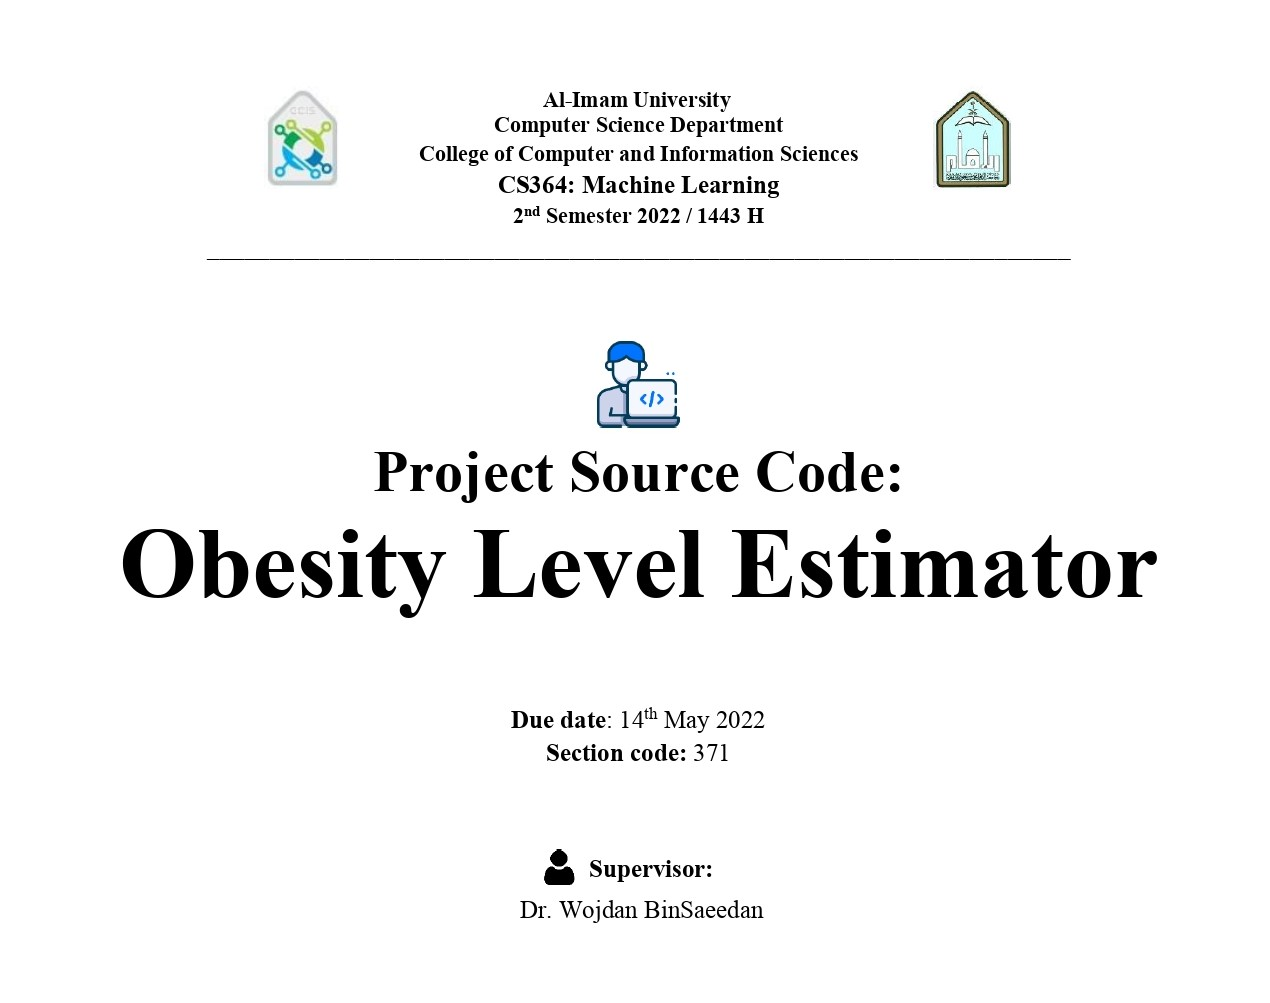

| Student name || Student ID |
| :-: || :-: |
| Nouf Mohammed Alajmi || 441022333  |
| Razan Alabdulkarim || 440021710|
| Abeer Mohammed Aldosari || 440023513 |

# Content Table

1. Introduction
2. Prepare dataset<br>
     2.1 Import dataset <br>
     2.2 Convert text features into numeric<br>
     2.3 Split dataset <br>
     2.4 Feature selection <br>
     2.5 Hyperparameter optimization <br>
3. Build Classification Random Forest<br>
     3.1 Classification Random Forest implementation<br>
     3.2  Model performance  <br>
4. Conclusion <br>     
5. Referencesects<br>

<h1>1. Introduction</h1>
Our project is about the obesity level estimation of people based on their eating habits and physical condition. The obesity dataset is from Kaggle [1]. This dataset contains obesity records that were collected from individuals in Colombia, Peru and Mexico. In this project, we implemented the Random Forest model and trained it using this dataset. In this Jypter Notebook, we will highly focus on discussing the model implementation as a code with comments in detail. Other aspects of the project, such as dataset explanation and results with discussion, are documented in the attached report file.

<h1>2. prepare dataset</h1>
In this section, we load the desired dataset from the "ObesityDataset.xlsx" file attached to this Jupyter Notebook. Then, we split the dataset into two parts based on their features; the first part contains the independent features while the second part contains the dependent feature. After finishing the splitting, we remove the less important features to reduce the complexity. Eventually, we perform the hyperparameter optimization using Grid Search and Cross-Validation.<br> <b>Important notice :</b> this dataset does not contain any null values so we skip the step of searching of any missing values .

<h2>2.1 Import dataset</h2>
First step is to get the obesity dataset from the external excel file by reading its content using the<b> <i>pandas </i></b> library then print the dataset content which consists of <b>16 features and 1 target (columns) </b> and <b> 2111 records (rows) </b>.

In [1]:
# get the dataset from the "ObesityDataset" excel file
import pandas as pd
dataset = pd.read_excel("ObesityDataset.xlsx")

# print small piece of the dataset content
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
# number of columns and rows
print("(rows, columns)")
dataset.shape

(rows, columns)


(2111, 17)

<h2>2.2 Split dataset</h2>
Before building the <b>Classification Random Forest</b> model we must split the dataset into two parts<br>
capital <b> X </b>: represents all the coulumns needed for <i>classification</i>, which indicated to all columns excepts for the target column (NObeyesdad). <br>
small <b> y </b>: represents the cloumn used for <i>prediction</i>, which is the target column (NObeyesdad).

In [3]:
# copy all columns expects for the target column and store it in "X"
X = dataset.drop('NObeyesdad', axis=1).copy()

# print small piece of dataset to ensure the data is correct 
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


After adjusting the required columns data in the <b> X </b>variable, next we adjust the target column data into the <b> y </b> variable

In [4]:
# copy the target column only and store it in "y"
y = dataset['NObeyesdad'].copy()

# print the target values
y.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

<h2>2.3 Convert text features into numeric</h2>
In this dataset, there appear two types of features which are <b>text </b> and <b>numeric </b>, listed as follows:

| Tetxt features || Numeric features |
| :-: || :-: |
| Gender || Age |
| family_history_with_overweight|| Height|
| FAVC|| Weight |
| CAEC || FCVC |
| SMOKE || NCP |
| SCC || CH2O |
| CALC || FAF |
| MTRANS || TUE|

However, the <b> <i>sklearn </i></b> library can <b>NOT</b> handle the text data type. Hence, we must convert all the features that consists of text into thier corresponding numeric values. The 8 text features' values will be converted as follows: <br><br>
<b>Gender:</b> convert { yes, no } into { 0, 1 }. <br>
<b>FAVC:</b> convert from { yes, no } into { 0, 1 }</br>
<b>SMOKE:</b> convert from { ye, no} into { 0, 1 }</br>
<b>SCC:</b> convert from { ye, no} into { 0, 1 }</br>
<b>family_history_with_overweight: </b>  convert { yes, no } into { 0, 1 }</br>
<b>CAEC:</b> convert from { Always, Frequently, Sometimes, no } into { 0, 1, 2, 3 }</br>
<b>CALC:</b> convert from { Always, Frequently, Sometimes, no } into { 0, 1, 2, 3 }</br>
<b>MTRANS:</b> convert from { Public_Transportation, Automobile, Motorbike, Walking, Bike} into { 0, 1, 2, 3,4 }</br>

The original source code is from this reference [2].

In [5]:
# convert text features into numeric by replacing text (object) variables with numbers

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = X.columns.tolist()
for column in cols:
    if X[column].dtype =='object':
        X[column] = le.fit_transform(X[column])
        
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


<h2>2.4 Feature selection </h2>
To reduce the complexity of the computations in the Random Forest model, we used the <b> select features </b>mechanism to reduce the number of features by removing the unimportant features using <b> <i>SelectFromModel </i> </b> funstion provided by sklearn. In this section, we implemented the model with and without feature selection to ensure that the accuracy is very similar. Hence, we used the model <b>with select feature</b> to reduce complexity of the computations and the size of the model.

In [6]:
# import required libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

After importing the required libraries, After importing the required libraries, we will continue preparing the dataset by selecting the most important features, which are the most relied on features in predicting in order to reduce the complexity of the model and make the training process faster.

We begin with splitting dataset into <b> training (80%) </b> and <b> testing (20%) </b>, which is the most common approach to split the dataset.

In [7]:
# Split dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h3> 2.4.1 Without feature selection </h3>
Build the model <b>without</b> feature selection to set the differences between results of the dataset with and without feature selection.

Training Accuracy is : 100.000 %
Tetsing Accuracy is : 96.927 %


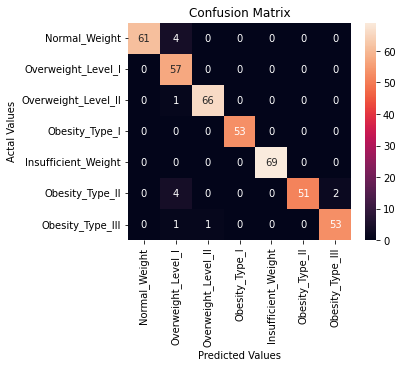

In [8]:
#Create a Gaussian Classifier
rf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# prediction on test set
y_pred=rf.predict(X_test)

# print the training accuracy
print(f'Training Accuracy is : {(rf.score(X_train,y_train)) *100:.3f} %')

# print the testing accuracy
print(f'Tetsing Accuracy is : {(rf.score(X_test,y_test)) *100:.3f} %')

# Creating  a confusion matrix,which compares the y_test and y_pred
cm=confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'], 
                     columns = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<h3> 2.4.2 With feature selection </h3>
Start the selection process by creating a selection Random Forest object and train it into our data. The original code used to implement the feature selection is from this erefernce [3].

In [9]:
# use SelectFromModel to select the important features
rf_select = SelectFromModel(RandomForestClassifier())

# train the model
rf_select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In this step, we <b>extract the important features </b>and visualize the importance of features in the figure bellow.

In [10]:
# extract the important features
feature_imp = pd.Series(rf.feature_importances_,index=['Gender','Age','Height','Weight','family_history_with_overweight',
                                                       'CAEC','FAVC', 'FCVC', 'NCP','SMOKE','CH2O','SCC','FAF', 'TUE','CALC','MTRANS']).sort_values(ascending=False)

No handles with labels found to put in legend.


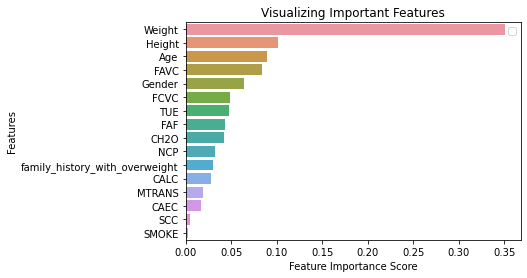

In [11]:
# visulize the feature importance
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

As shown in the figure above, the <b> Weight </b>feature  is the most important feature which is the most dependent on feature in training and predicting. Since our model is intended to estimate the level of obesity, it is obvious that the Weight features is the most relayed on feature. 

After visualizing the importance of features, now we get the selected features which are: <b>Weight, Height, Age, FCVC </b>

In [12]:
# select the important features
selected_feat = X_train.columns[(rf_select.get_support())]
no_selected_features = len(selected_feat)

# print the selected features
print ("number of selected features is (" + str(no_selected_features) + ") features")
print ("\nthe selected features are :")
i = 0
while i < no_selected_features:
    print(selected_feat[i])
    i = i +1

number of selected features is (4) features

the selected features are :
Age
Height
Weight
FCVC


Change the dataset's features, by making columns only include the selected features.

In [13]:
X=X[['Age', 'Height', 'Weight', 'FCVC']]

After done selecting the important features and changing the dataset, build the model again, which will be used in further steps, and print the results to set the differences between the performance before and after feature selection process.

In [14]:
# Split dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training Accuracy is : 100.000 %
Tetsing Accuracy is : 96.927 %


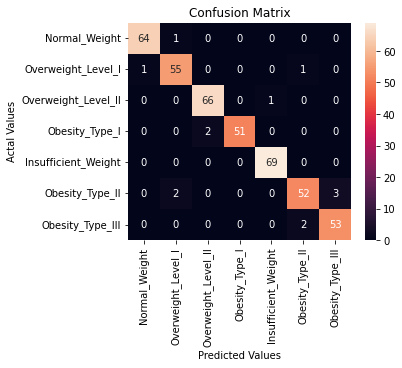

In [15]:
#Create a Gaussian Classifier
rf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# prediction on test set
y_pred=rf.predict(X_test)

# print the training accuracy
print(f'Training Accuracy is : { (rf.score(X_train,y_train)) * 100:.3f} %')

# print the testing accuracy
print(f'Tetsing Accuracy is : { (rf.score(X_test,y_test)) * 100:.3f} %')


# Creating  a confusion matrix,which compares the y_test and y_pred
cm=confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'], 
                     columns = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

The differences between the results with and without feature selection are pretty similar. We ran the code multiple times and it gives different values. In general, the performance of the model with feature selection sometimes appears the same as the model without feature selection and other times the model with feature selection outperforms the model without feature selection. Also, the main aim of implementing feature selection is to reduce the complexity of the model. Instead of dealing with all the features and building a huge random forest model, applying the feature selection reduces the size of the random forest and performs predictions faster.

<h2>2.5 Hyperparameter optimization </h2>
In this section, we will perform hyperparameter tuning, which is choosing the best parameters to enhance the performance and avoid overfitting. We used the <b> GridSearchCV </b>technique, which considers all the combinations of the candidates in finding the best parameters. This technique would take a long time if the number of parameters is large. Hence, we took advantage of applying the feature selection, which will reduce the time complexity of the method. The code of the GridSearchCV is from this reference [4].

Prepare parameters values to be used in the GridSearchCV process and the values chosen are random.

In [16]:
# parameters values
criterion = ['gini', 'entropy']
max_features = ['auto','sqrt']
max_depth = [None, 2,3,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

Then, create a <b> Grid </b>object by inserting the parameters with thier values.

In [17]:
# create the param grid
param_grid = {'criterion' : criterion,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap,
             }

We will start the <b>GridSearchCV </b> process, we applied the <b>3-Fold Cross-Validation </b>, because we have tried multiple k values and they gave similar values and larger k values result in a large number of instances which increases the time complexity and the CPU estimation. Hence, using k=3 gave a good performance in an acceptable time. This process may require time up to one or two minuets to finish.

In [18]:
# create GridSearchCV object with k = 3
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             verbose=2)

After finishing the process, print the <b>best chosen parameters </b>, which are the parameters to be used in building the final Random Forest model.

In [19]:
# print the best chosen parameters
rf_Grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

<h1>3. Build Classification Random Forest model</h1>
In this section, we will implement the final Random Forest model after applying feature selection and GridSearchCV.

<h2> 3.1 Classification Random Forest implementation </h2>

In [20]:
# create a Random Forest classifier with adjusting hyperparameters 
rf=RandomForestClassifier(bootstrap= False, criterion = 'entropy', max_depth= None, max_features ='sqrt',
                          min_samples_leaf=1, min_samples_split=2 )

# train the model
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='sqrt')

<h2>3.2 Model performance </h2>
In this section, we show the performance of the implemeneted model acording to <b>accuracy </b>and <b>confusion matrix</b>.

Training Accuracy is : 100.000 %
Tetsing Accuracy is : 96.217 %


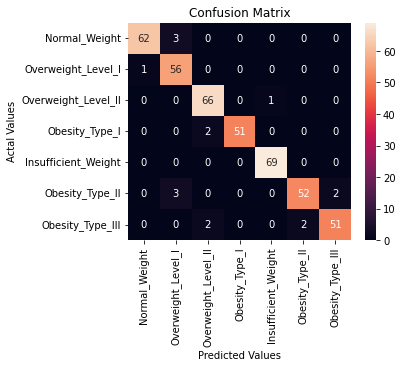

In [21]:
# prediction on test set
y_pred=rf.predict(X_test)

# print the training accuracy
print(f'Training Accuracy is : {(rf.score(X_train,y_train)) * 100:.3f} %')

# print the testing accuracy
print(f'Tetsing Accuracy is : {(rf.score(X_test,y_test)) * 100:.3f} %')

# Creating  a confusion matrix,which compares the y_test and y_pred
cm=confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'], 
                     columns = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Applying feature selection and GridSearchCV gave the best perfromance to the model, you can see the results and dicussion details in the <b>report</b> document.

<h1>4. Conclusion </h1>
In this document, we explained the implementation of the Random Forest classifier into the Obesity estimator dataset by using Python programming language. We first prepared the dataset; perform feature selection to reduce the complexity of the model, and used GridSearchCV to get the best parameters to improve the performance of the model. The rest of the details are in the report document.

# 5. Refernces
[1] [Obesity dataset from Kaggle](https://www.kaggle.com/code/mpwolke/obesity-levels-life-style/notebook) <br>
[2] [Convert textual data into numeric (source code)](https://youtu.be/OIkAx9OTjvA) <br>
[3] [Feature selection (source code)](https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f) <br>
[4] [GridSearchCV (source code)](https://www.youtube.com/watch?v=c4mS7KaOIGY&list=LL&index=2) <br>
